In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline


In [2]:
import nibabel as nib
from neuron.plot import slices
from pynd.segutils import seg_overlay, seg_overlap
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


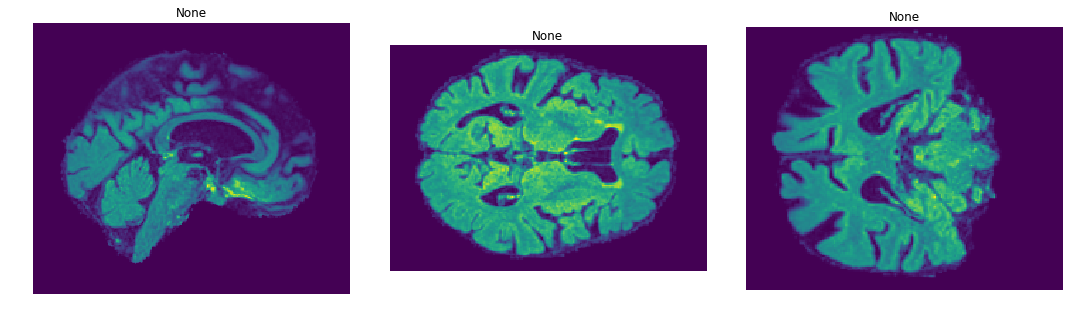

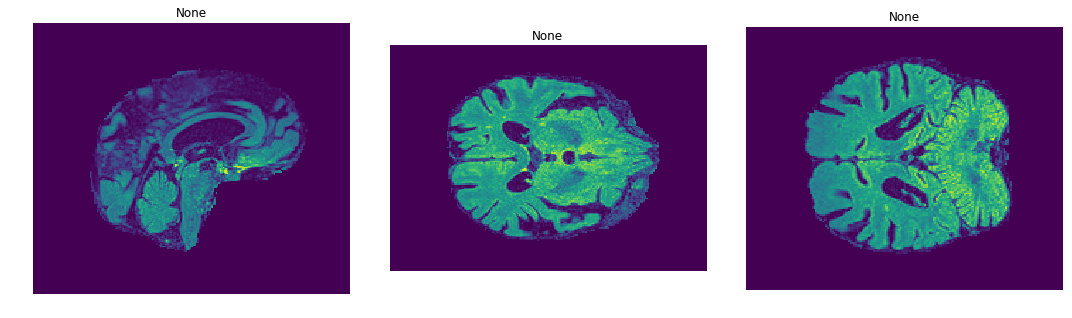

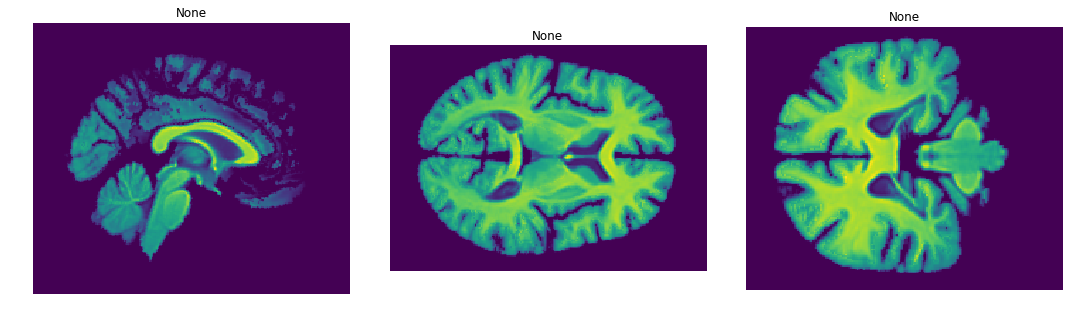

(<matplotlib.figure.Figure at 0x7f5464615198>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f54644888d0>,
       dtype=object))

In [5]:
t2_atlas_warped = nib.load("../t2_atlas_warped.nii").get_data()
t2_atlas = nib.load("../t2_atlas.nii").get_data()
t1_atlas = nib.load("../t1_atlas.nii").get_data() # this gives you a LxWxH volume

slices([t2_atlas_warped[80, :, :], t2_atlas_warped[:, 90, :], t2_atlas_warped[:, :, 90]])
slices([t2_atlas[80, :, :], t2_atlas[:, 90, :], t2_atlas[:, :, 90]])
slices([t1_atlas[80, :, :], t1_atlas[:, 90, :], t1_atlas[:, :, 90]])

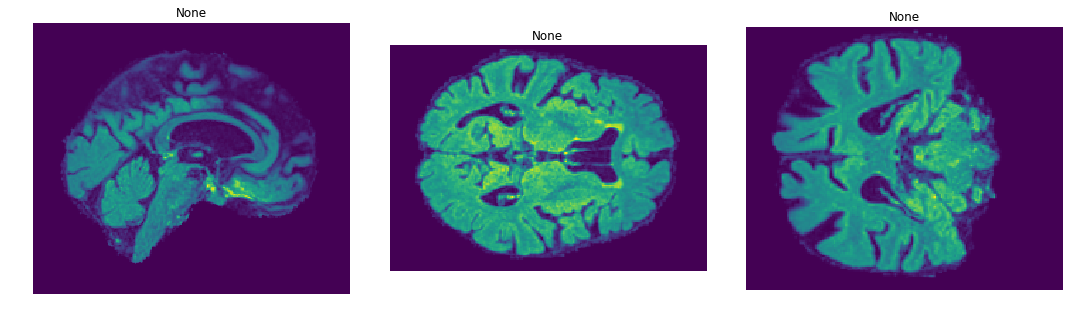

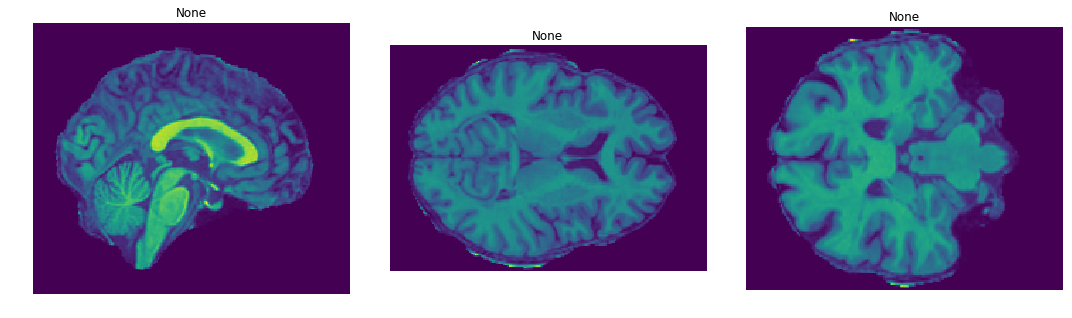

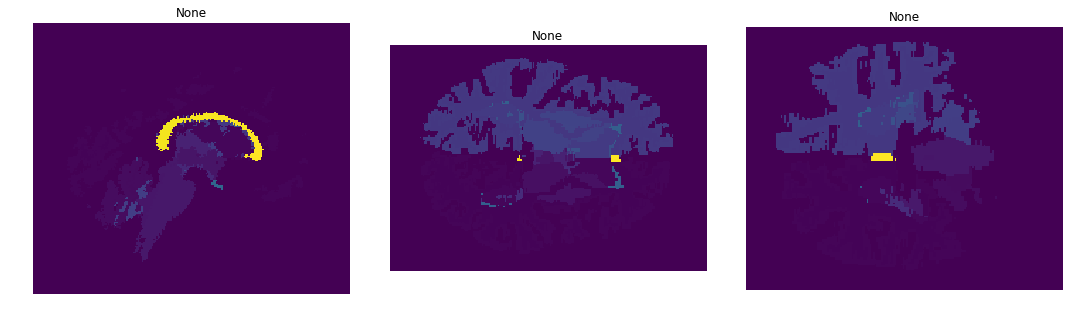

(<matplotlib.figure.Figure at 0x7f45a64a29b0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45a7c2df28>,
       dtype=object))

In [6]:
t2 = nib.load("../t2_atlas_warped.nii").get_data()
t2_seg = nib.load("../t2_atlas_seg_warped.nii").get_data()
t1_example = nib.load("../t1_027_S_2245.nii").get_data() # this gives you a LxWxH volume

slices([t2[80, :, :], t2[:, 90, :], t2[:, :, 90]])
slices([t1_example[80, :, :], t1_example[:, 90, :], t1_example[:, :, 90]])
slices([t2_seg[80, :, :], t2_seg[:, 90, :], t2_seg[:, :, 90]])

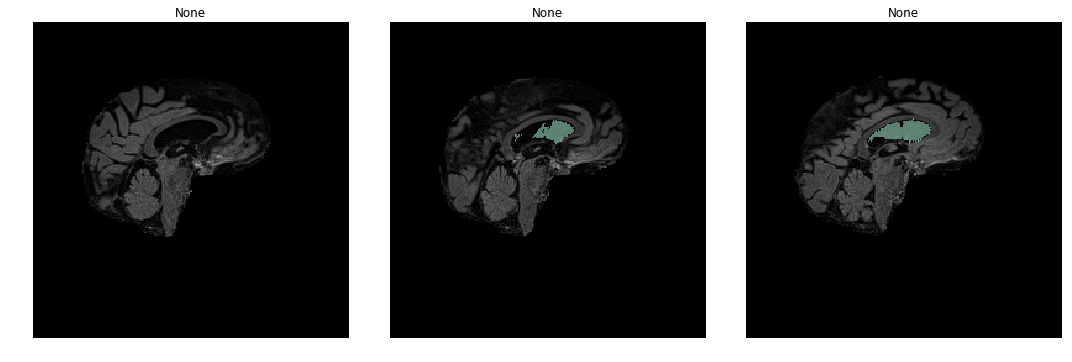

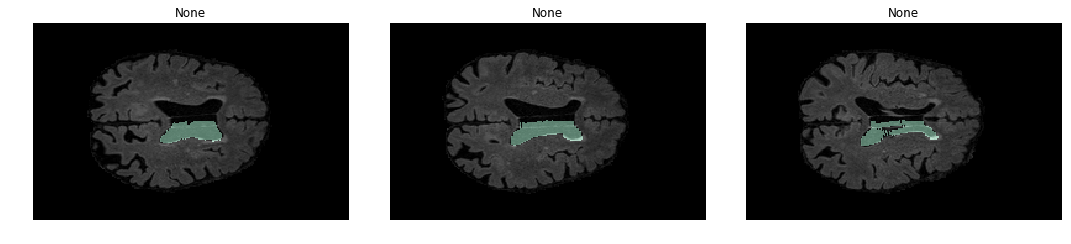

(<matplotlib.figure.Figure at 0x7f836c518f98>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f836c450d30>,
       dtype=object))

In [4]:
test = seg_overlay(t2/200, warped_seg4.astype(np.int))
plt.figure(figsize=(20,10))
slices([test[78, :, :, :], test[80, :, :, :], test[82, :, :, :]])
slices([test[:, 84, :, :], test[:, 88, :, :], test[:, 92, :, :]])

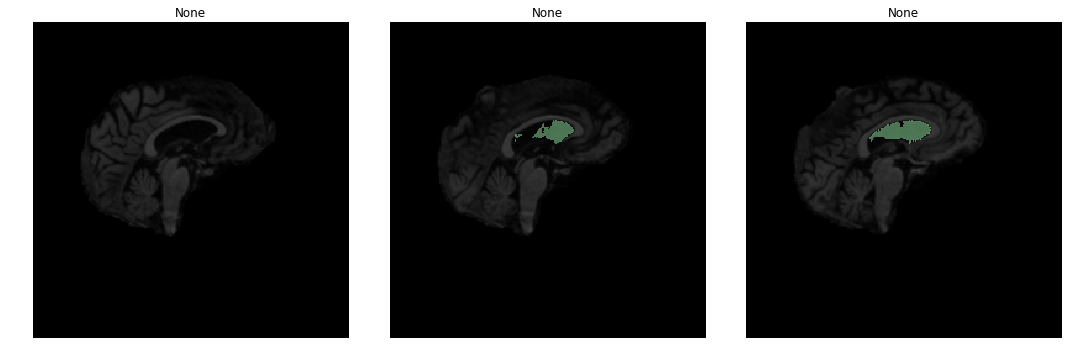

(<matplotlib.figure.Figure at 0x7f0bd7eb9518>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bd7de39b0>,
       dtype=object))

In [68]:
test_t1 = seg_overlay(warped, warped_seg4.astype(np.int))
plt.figure(figsize=(20,10))
slices([test_t1[78, :, :, :], test_t1[80, :, :, :], test_t1[82, :, :, :]])

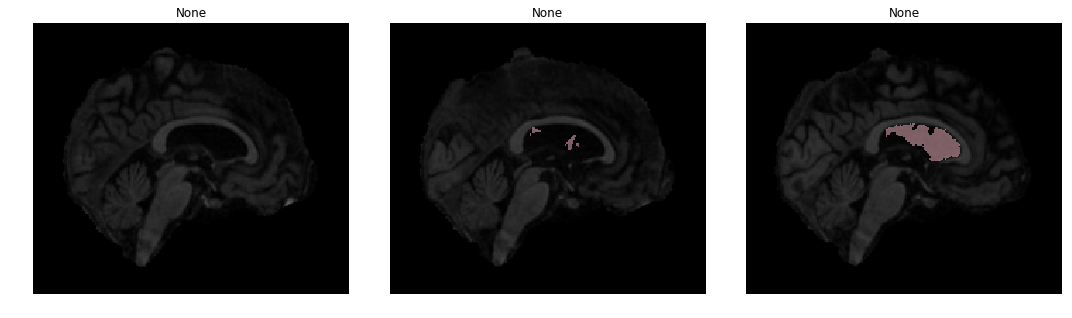

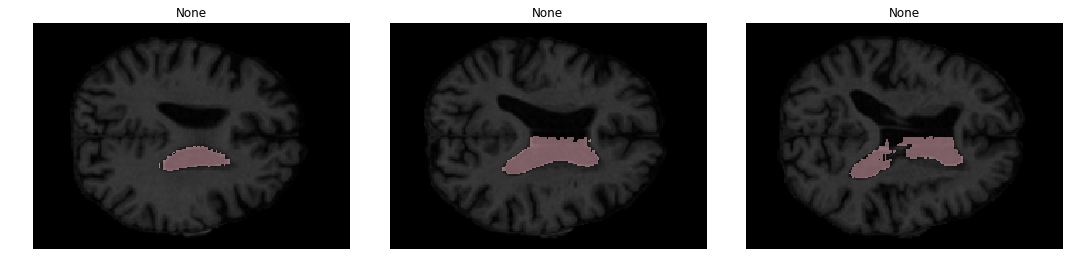

(<matplotlib.figure.Figure at 0x7f836c35c390>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f836c1eb240>,
       dtype=object))

In [5]:
test_orig = seg_overlay(t1, seg4.astype(np.int))
plt.figure(figsize=(20,10))
slices([test_orig[78, :, :, :], test_orig[80, :, :, :], test_orig[82, :, :, :]])
slices([test_orig[:, 70, :, :], test_orig[:, 75, :, :], test_orig[:, 80, :, :]])

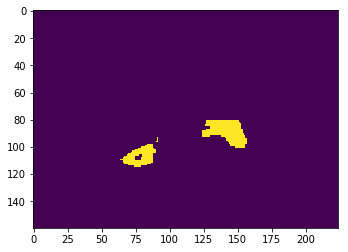

In [44]:
plt.imshow(seg4[:,90,:])

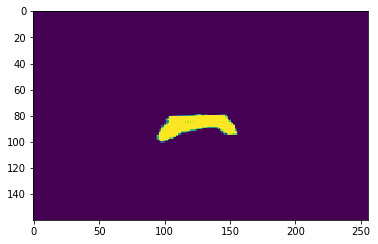

In [45]:
warped_seg4 = nib.load("../t1_141_S_1052_seg4_warped.nii.gz").get_data()
plt.imshow(warped_seg4[:,90,:])

In [51]:
# t2[80,12:204,:224])

np.max(t2[:,:,224:])
print(np.shape(t2[:,12:204,:224]))
print(np.shape(t1))

(160, 192, 224)
(160, 192, 224)


In [9]:
nii = nib.Nifti1Image(t2[:,12:204,:224]/300, np.eye(4)); 
nii_seg = nib.Nifti1Image(warped_seg[:,12:204,:224], np.eye(4)); 
nii_t1 = nib.Nifti1Image(warped[:,12:204,:224], np.eye(4)); 

nib.save(nii, "../t2_atlas.nii");
nib.save(nii_seg, "../t2_atlas_seg.nii");
nib.save(nii_t1, "../t2_atlas_t1.nii");


In [8]:
np.max(t2)

273.0

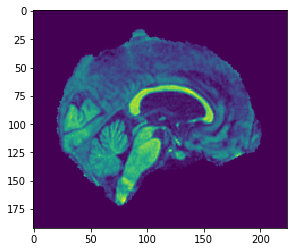

In [45]:
plt.imshow(t1[80,:,:])

In [41]:
print(t2.shape)
print(t1.shape)

(160, 256, 256)
(160, 192, 224)


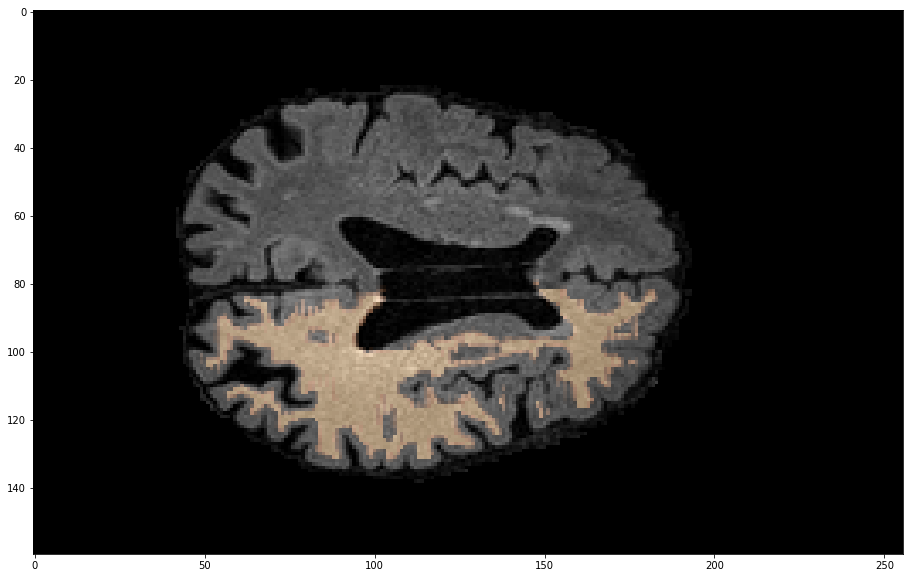

In [31]:
plt.figure(figsize=(20,10))
plt.imshow(t2[:, 90, :], cmap='gray')
plt.imshow(warped_seg[:, 90, :], cmap='copper', alpha=0.4)

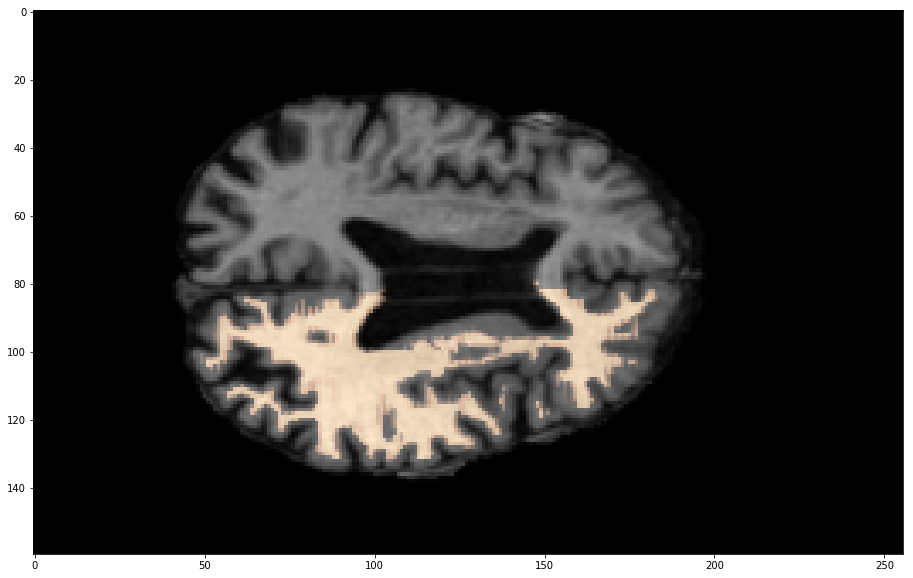

In [27]:
plt.figure(figsize=(20,10))
plt.imshow(warped[:, 90, :], cmap='gray')
plt.imshow(warped_seg[:, 90, :], cmap='copper', alpha=0.4)

(array([40826,  1615,    55,    26,     0,     0,     0,     0,     0,
          486]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]))

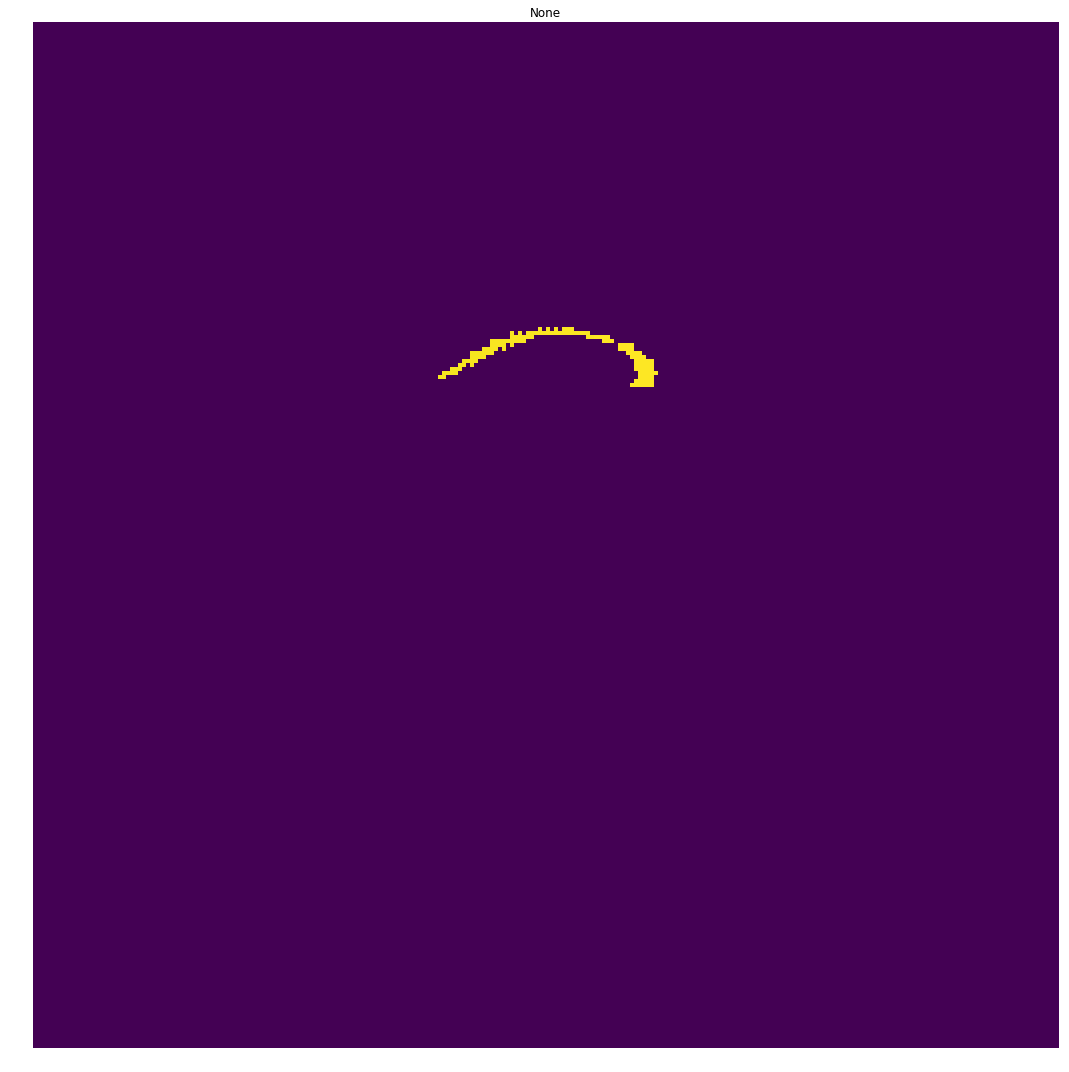

(<matplotlib.figure.Figure at 0x7fe799fbc278>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7fe724410f28>])

In [41]:
test_seg = np.copy(warped_seg)
test_seg[test_seg<252] = 0
slices([test_seg[80,:,:]])

In [32]:
np.histogram(test_seg)

(array([6880637,       0,       0,       0,       0,       0,       0,
              0,       0,     643]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]))